In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
#loading the data
df = pd.read_csv("C:/Users/moe/Downloads/WeatherData/usa_rain_prediction_dataset_2024_2025.csv")

In [6]:
#first 5 rows
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [7]:
#dtypes - counts - col names 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [43]:
#turning date col to date type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           73100 non-null  datetime64[ns]
 1   Location       73100 non-null  object        
 2   Temperature    73100 non-null  float64       
 3   Humidity       73100 non-null  float64       
 4   Wind Speed     73100 non-null  float64       
 5   Precipitation  73100 non-null  float64       
 6   Cloud Cover    73100 non-null  float64       
 7   Pressure       73100 non-null  float64       
 8   Rain Tomorrow  73100 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 5.0+ MB


In [44]:
#summary statistics
df.describe()

,Date,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,2024-12-31 00:00:00,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
min,2024-01-01 00:00:00,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,2024-07-01 00:00:00,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,2024-12-31 00:00:00,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,2025-07-02 00:00:00,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,2025-12-31 00:00:00,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000
std,NaN,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526


In [ ]:
#the max and min of our dates looks accurate which is a good sign.

In [45]:
#rows and cols
df.shape

(73100, 9)

In [46]:
#checking for how many unique locations are in our data
df["Location"].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Indianapolis',
       'Charlotte', 'San Francisco', 'Seattle', 'Denver',
       'Washington D.C.'], dtype=object)

In [ ]:
#something is abet off here. this data is recorded in the span of 2 years in 20 different cities as we see here
#the number of rows is far more than the number of days in 2 years multiplied by 20. lets continue but keeping this
#in mind for now.

In [47]:
#making sure that our victor is only 0 and 1
df["Rain Tomorrow"].unique()

array([0, 1], dtype=int64)

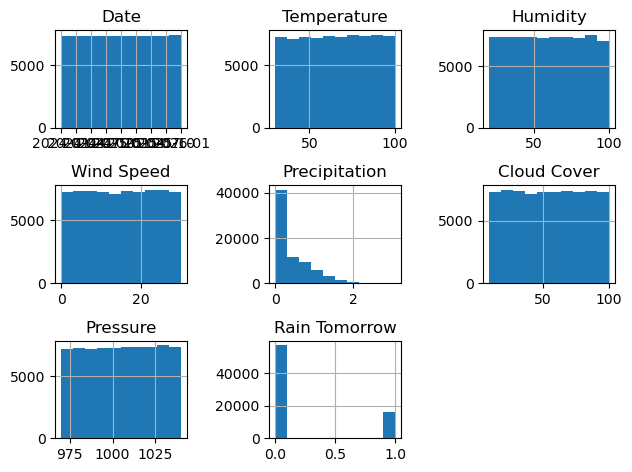

In [48]:
#lets check distribution 
df.hist()

plt.tight_layout(pad=1.0)
plt.show()

In [49]:
#checking for any na values
df.isna().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [50]:
#checking for duplicates
df.duplicated().sum()

0

In [58]:
#checking for duplicates based on location date combination
duplicate_counts = df.groupby(['Location', 'Date']).size()

duplicates = duplicate_counts[duplicate_counts > 1]

print(duplicates if not duplicates.empty else 0)

Location         Date      
Austin           2024-01-01    5
                 2024-01-02    5
                 2024-01-03    5
                 2024-01-04    5
                 2024-01-05    5
                              ..
Washington D.C.  2025-12-27    5
                 2025-12-28    5
                 2025-12-29    5
                 2025-12-30    5
                 2025-12-31    5
Length: 14620, dtype: int64


In [ ]:
#interesting there are duplicates of location date combinations! lets investigate further.

In [70]:
#first duplicated combination of date and location
first_duplicate = df[(df['Location'] == "Austin") & (df['Date'] == "2024-01-01")]
first_duplicate

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
36550,2024-01-01,Austin,91.774699,40.189679,25.899787,0.000000,39.738558,1004.091309,0
37281,2024-01-01,Austin,31.518506,61.679413,16.102848,0.000000,97.840742,1021.403106,0
38012,2024-01-01,Austin,77.501865,49.268099,5.655318,0.000000,34.513337,1009.919571,0
38743,2024-01-01,Austin,88.408993,38.496992,26.622938,1.251204,30.111336,978.023966,0
39474,2024-01-01,Austin,33.661801,40.844865,9.942161,1.091417,85.603752,982.023196,0


In [71]:
#checking one more
s_duplicate = df[(df['Location'] == "Washington D.C.") & (df['Date'] == "2025-12-27")]
s_duplicate

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
70171,2025-12-27,Washington D.C.,72.579062,64.122916,3.777156,1.015507,45.539930,980.444153,1
70902,2025-12-27,Washington D.C.,66.914633,71.928111,17.218499,0.166565,81.587381,1029.792390,0
71633,2025-12-27,Washington D.C.,98.288047,99.567739,15.151905,1.087658,44.001504,1012.118104,1
72364,2025-12-27,Washington D.C.,45.003534,70.402858,6.175558,0.143401,53.601651,978.461117,0
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0


In [ ]:
#it seems consistent with the 5 duplicates per a combination of location and date 
#this seems to solve our high value of rows mystery and now the number of rows makes more sense!

#but that makes us question the data structure and how these variables were recorded
#is it being recorded 5 different times a day? because that would make us question our approach for how we do our model
#but also its not consistent with our vector which makes us question how these vectors were chosen
#is it a majority vote kind of situation where 3 0s means a no and 3 1s means a yes?
#ill do some research dive deeper and try to findout how the data was collected and how its structured

In [ ]:
#i was not able to find anything that talks about how the data was recorded

#but after doing some research and further examination looking at the different rows with same date and location
#the weather conditions are at such wide range that its not plausible that these recordings happened in the same
#day

#after acknowledging this hurdle 

#examining the rows separately the weather conditions seems mostly plausible with our vector of rain or no rain.

#therefore, i have decided to move on forward with the data for the sake of the project and deal with each row
#as its own recording. excluding dates and locations. and only focusing on weather conditions and the result of our
#vector as if each row is a seperate unique observation.

In [ ]:
#but before we do so lets collect some summary statistics of these interesting location-date combinations
#just in case.

In [82]:
summary_stats_D_L = df.groupby(['Date', 'Location']).agg(['mean', 'std', 'min', 'max'])
summary_stats_D_L = summary_stats_D_L.reset_index()

summary_stats_D_L.head(15)

Date      Location Temperature                                   \
                                   mean        std        min        max   
0  2024-01-01        Austin   64.573173  29.678883  31.518506  91.774699   
1  2024-01-01     Charlotte   70.934917  17.987324  47.661350  93.610944   
2  2024-01-01       Chicago   82.090968  14.313582  61.666932  94.808806   
3  2024-01-01      Columbus   67.417930  14.728791  55.117219  91.487531   
4  2024-01-01        Dallas   62.702620  28.158802  30.262828  92.124921   
5  2024-01-01        Denver   58.363087  27.956273  30.004853  96.265302   
6  2024-01-01    Fort Worth   64.645704  19.892237  44.962770  91.300888   
7  2024-01-01       Houston   65.924560  27.683960  38.009264  99.417991   
8  2024-01-01  Indianapolis   66.575864  25.127655  43.784332  94.635505   
9  2024-01-01  Jacksonville   45.878809  10.099249  32.677378  61.104296   
10 2024-01-01   Los Angeles   65.704203  19.953105  45.120796  91.804164   
11 2024-01-01      New York   58.827174  30.533005  31.855688  96.288813   
12 2024-01-01  Philadelphia   68.751258  20.810834  39.040305  95.623451   
13 2024-01-01       Phoenix   65.612022  18.095221  40.388868  87.023726   
14 2024-01-01   San Antonio   62.999047  15.727365  52.540085  90.815997   

     Humidity                                   ... Cloud Cover             \
         mean        std        min        max  ...         min        max   
0   46.095810   9.658014  38.496992  61.679413  ...   30.111336  97.840742   
1   55.235346  34.329723  20.484206  92.027747  ...   17.541855  60.232098   
2   60.129519  28.508705  21.750045  91.532243  ...   31.875955  84.296396   
3   53.431656  23.419719  26.528753  81.979649  ...   27.969933  59.788457   
4   64.954747  23.734281  37.866010  94.572104  ...   17.031086  66.469758   
5   48.997168  26.474501  28.378109  92.236301  ...   34.586710  90.452885   
6   35.892896  13.462707  20.775475  51.599587  ...   51.561822  98.451130   
7   52.237092  30.349143  20.415728  92.066726  ...   12.096297  94.032211   
8   57.502534  15.917989  36.361594  75.912776  ...   16.149990  78.366054   
9   58.482051  20.228121  27.968109  79.539495  ...   17.368630  79.725260   
10  45.574523  22.209905  21.837938  69.884058  ...   21.069580  76.351553   
11  59.060290  15.617382  40.880140  75.655455  ...   47.778458  83.871577   
12  71.046925  18.131626  42.108289  84.752137  ...   26.687947  86.684781   
13  68.942286  14.803016  54.764887  91.314435  ...   52.808812  79.396393   
14  61.634328  25.365494  28.056765  95.488472  ...   13.328851  97.762359   

       Pressure                                      Rain Tomorrow            \
           mean        std          min          max          mean       std   
0    999.092230  18.541986   978.023966  1021.403106           0.0  0.000000   
1   1001.076797  19.733268   981.667197  1029.733994           0.0  0.000000   
2   1015.303810  22.830255   981.152365  1033.273812           0.0  0.000000   
3   1012.701539  23.387487   973.011298  1032.674864           0.2  0.447214   
4   1010.653566  16.233978   990.517209  1033.906107           0.2  0.447214   
5    998.559680  22.019765   973.709510  1029.062995           0.0  0.000000   
6   1021.171211  10.548841  1010.355218  1033.780827           0.0  0.000000   
7   1014.792046  22.983141   976.922722  1032.729598           0.2  0.447214   
8    997.159098  20.800573   971.585778  1016.842113           0.2  0.447214   
9   1008.136390  26.285927   970.997414  1030.683860           0.0  0.000000   
10   997.199435  23.297131   974.913898  1033.533784           0.0  0.000000   
11  1015.442501  14.424779   991.799861  1027.471786           0.0  0.000000   
12  1001.172871  16.725953   985.949437  1025.810502           0.2  0.447214   
13  1006.829881  27.430185   976.881715  1033.076454           0.4  0.547723   
14   996.333217  25.445041   970.521586  1032.299403           0.0  0.000000   

            
   min max  
0 

In [83]:
summary_stats_D_L.shape

(14620, 30)

In [84]:
%store summary_stats_D_L

Stored 'summary_stats_D_L' (DataFrame)


In [86]:
#lets also get some summary statistics of each unqiue date and city seperately.
summary_stats_by_city = df.groupby('Location').describe().reset_index()

summary_stats_by_city.head(15)

Location  Date                                                      \
                 count                           mean                  min   
0         Austin  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
1      Charlotte  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
2        Chicago  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
3       Columbus  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
4         Dallas  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
5         Denver  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
6     Fort Worth  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
7        Houston  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
8   Indianapolis  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
9   Jacksonville  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
10   Los Angeles  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
11      New York  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
12  Philadelphia  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
13       Phoenix  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   
14   San Antonio  3655  2024-12-31 00:00:00.000000256  2024-01-01 00:00:00   

                                                                   \
                    25%                  50%                  75%   
0   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
1   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
2   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
3   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
4   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
5   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
6   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
7   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
8   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
9   2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
10  2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
11  2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
12  2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
13  2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   
14  2024-07-01 00:00:00  2024-12-31 00:00:00  2025-07-02 00:00:00   

                             Temperature  ...     Pressure             \
                    max  std       count  ...          max        std   
0   2025-12-31 00:00:00  NaN      3655.0  ...  1039.998725  20.239734   
1   2025-12-31 00:00:00  NaN      3655.0  ...  1039.974016  20.595156   
2   2025-12-31 00:00:00  NaN      3655.0  ...  1039.993521  20.139891   
3   2025-12-31 00:00:00  NaN      3655.0  ...  1039.972832  20.219052   
4   2025-12-31 00:00:00  NaN      3655.0  ...  1039.994171  20.293942   
5   2025-12-31 00:00:00  NaN      3655.0  ...  1039.939367  20.020748   
6   2025-12-31 00:00:00  NaN      3655.0  ...  1039.996500  20.078422   
7   2025-12-31 00:00:00  NaN      3655.0  ...  1039.987375  20.241111   
8   2025-12-31 00:00:00  NaN      3655.0  ...  1039.981546  20.304709   
9   2025-12-31 00:00:00  NaN      3655.0  ...  1039.931904  19.996861   
10  2025-12-31 00:00:00  NaN      3655.0  ...  1039.971021  20.301689   
11  2025-12-31 00:00:00  NaN      3655.0  ...  1039.988627  20.237997   
12  2025-12-31 00:00:00  NaN      3655.0  ...  1039.992732  20.368170   
13  2025-12-31 00:00:00  NaN      3655.0  ...  1039.954056  20.157536   
14  2025-12-31 00:00:00  NaN      3655.0  ...  1039.970564  20.050951   

   Rain Tomorrow                                               
           count      mean  min  25%  50%  75%  max       std  
0         3655.0  0.214501  0.0  0.0  0.0  0.0  1.0  0.410532  
1         3655.0  0.221614  0.0  0.0  0.0  0.0  1.0  0.415390  
2        

In [87]:
%store summary_stats_by_city

Stored 'summary_stats_by_city' (DataFrame)


In [88]:
#one grouped by date
summary_stats_by_date = df.groupby('Date').describe().reset_index()

summary_stats_by_date.head(15)

Date Temperature                                              \
                    count       mean        std        min        25%   
0  2024-01-01       100.0  64.888432  21.016609  30.004853  45.659901   
1  2024-01-02       100.0  64.496711  19.370107  31.433457  48.279891   
2  2024-01-03       100.0  62.856064  19.212318  30.364878  46.760827   
3  2024-01-04       100.0  64.642161  19.732846  30.473326  48.852566   
4  2024-01-05       100.0  68.293850  19.093052  31.798542  55.321731   
5  2024-01-06       100.0  61.490193  22.105184  30.630160  40.900886   
6  2024-01-07       100.0  64.575866  19.909226  30.630024  49.640994   
7  2024-01-08       100.0  63.461663  20.112877  30.139771  45.414555   
8  2024-01-09       100.0  62.998839  23.072010  30.230479  40.940651   
9  2024-01-10       100.0  65.802166  19.243934  30.833240  51.320486   
10 2024-01-11       100.0  65.460956  19.835720  30.271209  47.933990   
11 2024-01-12       100.0  65.764905  19.761869  30.000766  48.901447   
12 2024-01-13       100.0  63.301953  21.013769  30.068177  46.005788   
13 2024-01-14       100.0  63.726229  20.625976  30.427375  45.021770   
14 2024-01-15       100.0  65.408970  21.641276  30.737248  45.744148   

                                    Humidity  ...     Pressure               \
          50%        75%        max    count  ...          75%          max   
0   62.779760  86.822771  99.417991    100.0  ...  1026.575299  1038.707275   
1   68.267058  79.158908  99.927811    100.0  ...  1026.772731  1038.964160   
2   61.534740  78.558443  99.430378    100.0  ...  1020.798720  1039.962493   
3   65.783911  79.684475  99.454367    100.0  ...  1017.339562  1039.260615   
4   71.115211  82.829151  99.031929    100.0  ...  1022.138095  1038.594594   
5   60.511575  81.465840  99.721505    100.0  ...  1018.558534  1039.993521   
6   63.567417  80.206488  99.900686    100.0  ...  1025.284918  1039.557908   
7   62.912781  79.462517  97.892947    100.0  ...  1023.538473  1039.897652   
8   61.062446  86.102080  99.658976    100.0  ...  1022.510210  1039.361166   
9   62.969016  82.703562  99.891472    100.0  ...  1022.562969  1039.590176   
10  64.726097  82.063554  99.974820    100.0  ...  1026.365028  1039.390127   
11  69.098374  82.355656  98.277348    100.0  ...  1022.085463  1038.674652   
12  62.812577  81.779916  99.924324    100.0  ...  1023.482980  1038.632819   
13  62.046606  82.368947  99.790864    100.0  ...  1019.582065  1039.861784   
14  66.262357  85.832686  99.595046    100.0  ...  1020.704551  1039.037154   

   Rain Tomorrow                                            
           count  mean       std  min  25%  50%   75%  max  
0          100.0  0.14  0.348735  0.0  0.0  0.0  0.00  1.0  
1          100.0  0.22  0.416333  0.0  0.0  0.0  0.00  1.0  
2          100.0  0.19  0.394277  0.0  0.0  0.0  0.00  1.0  
3          100.0  0.23  0.422953  0.0  0.0  0.0  0.00  1.0  
4          100.0  0.18  0.386123  0.0  0.0  0.0  0.00  1.0  
5          100.0  0.26  0.440844  0.0  0.0  0.0  1.00  1.0  
6          100.0  0.19  0.394277  0.0  0.0  0.0  0.00  1.0  
7          100.0  0.20  0.402015  0.0  0.0  0.0  0.00  1.0  
8          100.0  0.25  0.435194  0.0  0.0  0.0  0.25  1.0  
9          100.0  0.23  0.422953  0.0  0.0  0.0  0.00  1.0  
10         100.0  0.21  0.409360  0.0  0.0  0.0  0.00  1.0  
11         100.0  0.22  0.416333  0.0  0.0  0.0  0.00  1.0  
12         100.0  0.24  0.429235  0.0  0.0  0.0  0.00  1.0  
13         100.0  0.18  0.386123  0.0  0.0  0.0  0.00  1.0  
14         100.0  0.15  0.358870  0.0  0.0  0.0  0.00  1.0  

[15 rows x 57 columns]

In [89]:
%store summary_stats_by_date

Stored 'summary_stats_by_date' (DataFrame)


In [92]:
#one grouped by our vector.
summary_stats_by_vector = df.groupby('Rain Tomorrow').describe().reset_index()

summary_stats_by_vector

Rain Tomorrow   Date                                                      \
                 count                           mean                  min   
0             0  56988  2024-12-30 22:23:05.723310080  2024-01-01 00:00:00   
1             1  16112  2024-12-31 05:42:45.044687360  2024-01-01 00:00:00   

                                                                  \
                   25%                  50%                  75%   
0  2024-07-01 00:00:00  2024-12-30 00:00:00  2025-07-02 00:00:00   
1  2024-07-02 00:00:00  2025-01-02 00:00:00  2025-07-02 00:00:00   

                            Temperature  ... Cloud Cover            Pressure  \
                   max  std       count  ...         max        std    count   
0  2025-12-31 00:00:00  NaN     56988.0  ...   99.998957  25.967811  56988.0   
1  2025-12-31 00:00:00  NaN     16112.0  ...   99.990510  26.034462  16112.0   

                                                                               \
          mean         min         25%          50%          75%          max   
0  1005.199426  970.000919  987.727163  1005.364426  1022.708171  1039.998725   
1  1005.093203  970.001089  987.604562  1005.050845  1022.812162  1039.999765   

              
         std  
0  20.199244  
1  20.220718  

[2 rows x 57 columns]

In [93]:
%store summary_stats_by_vector

Stored 'summary_stats_by_vector' (DataFrame)


In [ ]:
#after abet of thought i have decided not to remove the location or the dates since they could be of value to the 
#prediction and i can always remove them later if they are not important or cause problems.

In [94]:
#we,ll also save the duplicates series just in case!
%store duplicates

Stored 'duplicates' (Series)


In [96]:
#lets download our clean df
df.to_csv('C:/Users/moe/Desktop/result of data wrangling/cleaned_df.csv', index=False)